 * ML-tutorial—2:Exploratory Data Analysis(EDA) 

DATA ANLYSYS with a basic skill on statistics is the pre-requisite for Machine Learning In a nutshell, a machine learning project has two main parts:

- Exploratory Data Analysis : step of Preprocessing Data Understanding, Data Cleaning, Target Variable Selection, Feature Extraction, Scaling, Dimensionality Reduction.

- Modeling and Prediction Training, Performance Metrics, Evaluation, Deployement.

# Exploratory Data Analysis  

To begin to analyze the data you need:
i) A tool that allows you to look at the data = that is “python library”.
ii) Skill in basic statistics.

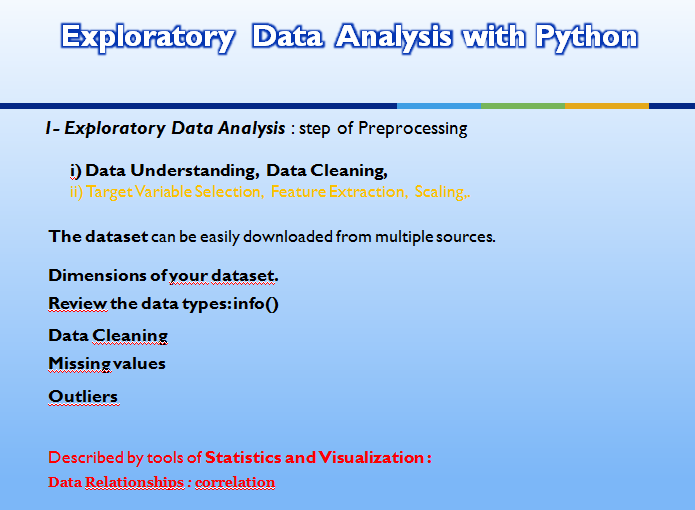

In [1]:
from IPython.display import Image
Image("img/1.png")

## Dataset

### import Library

In [1]:

import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib 


print( 'numpy version:', np.__version__)
print("pandas version:", pd.__version__)
print("SciPy version:", sp.__version__)
print('scikit-learn version:', sk.__version__)
print('seaborn:', sns.__version__)
print ('matplotlib version:', matplotlib.__version__)

numpy version: 1.15.4
pandas version: 0.23.4
SciPy version: 0.19.1
scikit-learn version: 0.20.2
seaborn: 0.8.0
matplotlib version: 2.2.2


Preliminaries: environement of working

In [2]:
!pwd

/cygdrive/c/Users/Mohamed/1Uminho/Folder1-tutorial


In [5]:
%cd "C:/Users/Mohamed/1Uminho"

C:\Users\Mohamed\1Uminho


In [6]:
import os
os.getcwd( )

'C:\\Users\\Mohamed\\1Uminho'

In [7]:
%cd "C:/Users/Mohamed/1Uminho/Folder1-tutorial/"

C:\Users\Mohamed\1Uminho\Folder1-tutorial


###  Import the dataset

In [8]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [9]:
df.shape

(20640, 10)

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [11]:
# display the last 5 rows
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# Description
**'describe()' method to get the statistical summary of the various features of the data set

In [12]:
df.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


 All attributes are numerical, except the ocean_proximity field. Its type is object, it must be a text attribute.

In [14]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Missing values 

In [15]:
# isnull() ?
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
# fill missing values with mean column values
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Target Variable Selection,  Transformations

http://localhost:8888/notebooks/divers-ML/1Uminho/salary/basic_data_preprocessing-master/chapter_07/rescale-NS.ipynb

http://localhost:8888/notebooks/divers-ML/1Uminho/salary/basic_data_preprocessing-master/data_cleaning_and_preprocessing.ipynb

http://localhost:8888/notebooks/divers-ML/1Uminho/tutoML%20-%20handson-1.ipynb#Description

# Correlation matrix 

In [18]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [19]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Visualisation

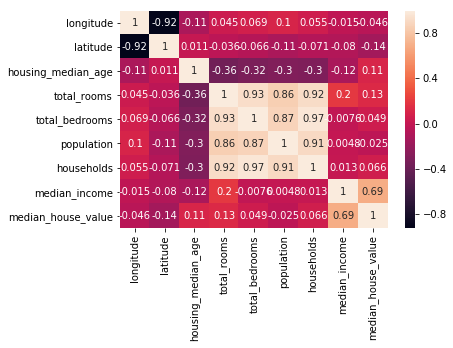

In [23]:
from matplotlib import pyplot as plt
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Another way to use Pandas’ scatter_matrix function, 
which plots every numerical attribute against every other numerical attribute.

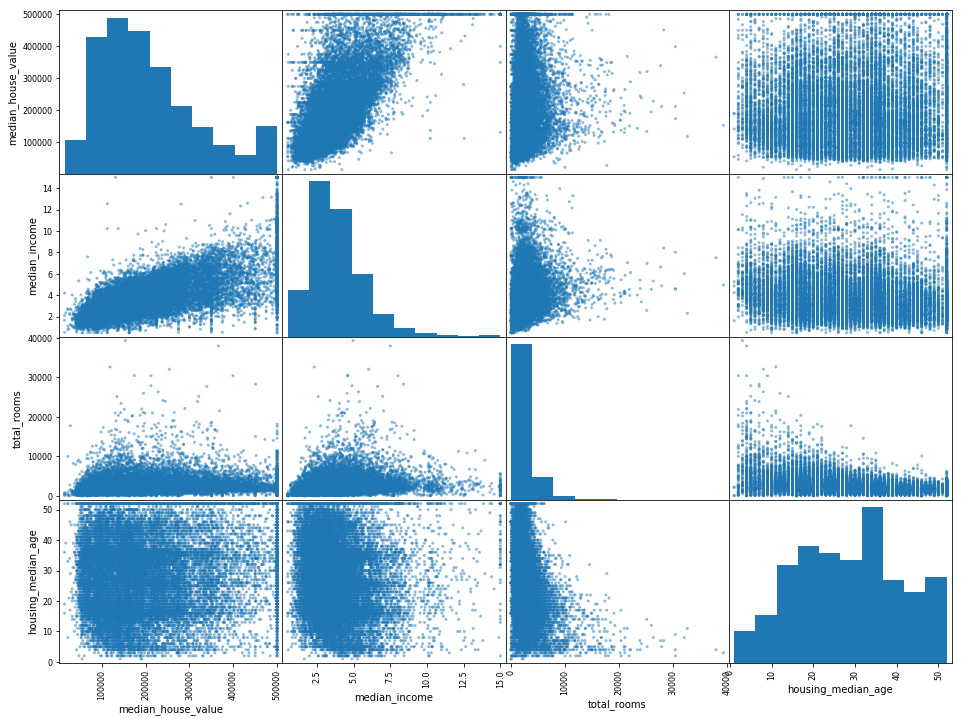

In [24]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(df[attributes], figsize=(16, 12))
plt.show()

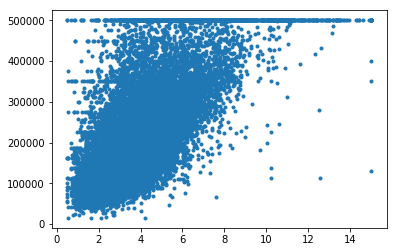

In [47]:
plt.plot(df['median_income'],df['median_house_value'],'. ')
plt.show()

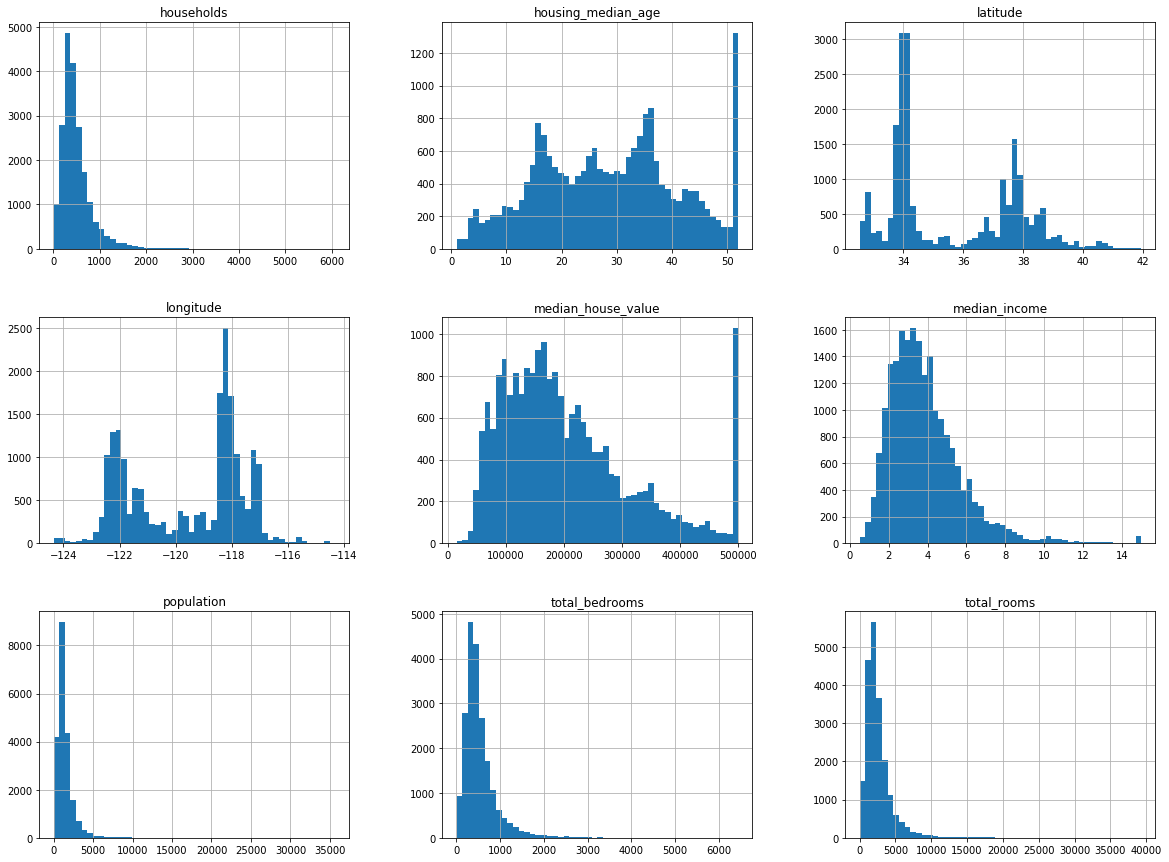

In [26]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

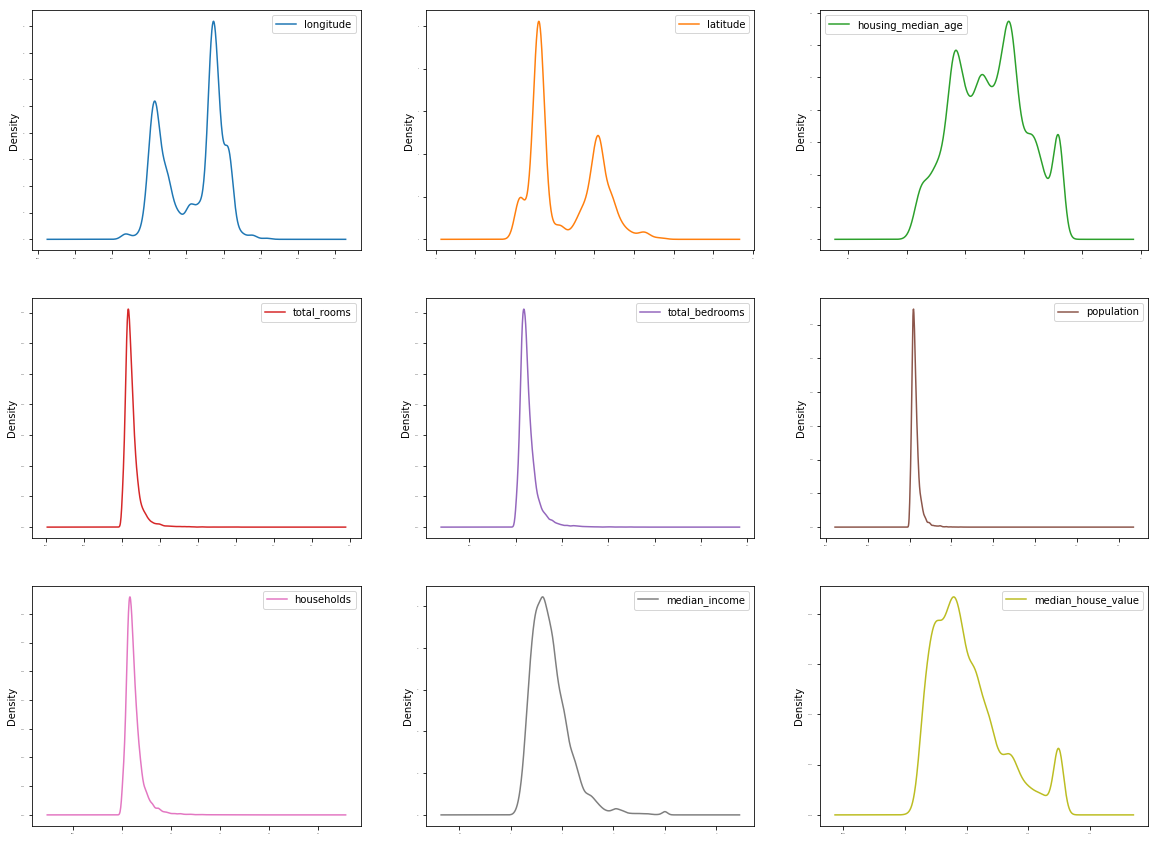

In [41]:
# density
df.plot(kind='density', subplots=True,layout=(3,3),  sharex=False, legend=True,
fontsize=1,figsize=(20,15))
plt.show()